In [1]:
!pip install tensorflow
!pip install scikeras

In [2]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPooling2D,Conv2D,UpSampling2D,Input,Dropout, Dense, Flatten
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from skimage import color

#img = color.rgb2gray(io.imread('image.png'))

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# defining function to plot images pair
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale, cmap='gray')

    plt.show()

Funcion para convertir las imagenes a escala de grises:


```
color.rgb2gray( <image> )
```



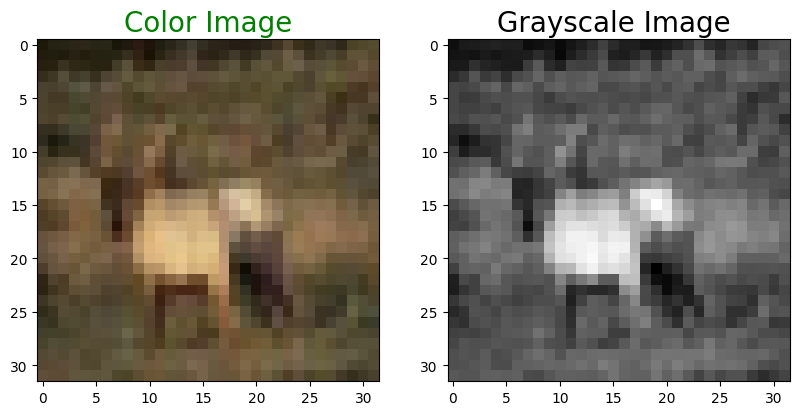

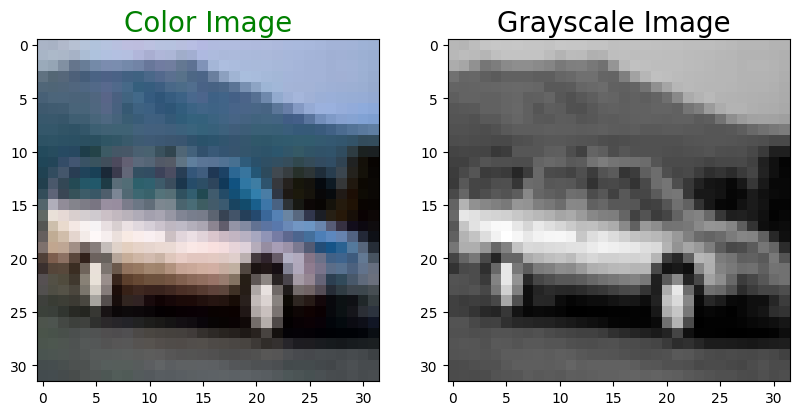

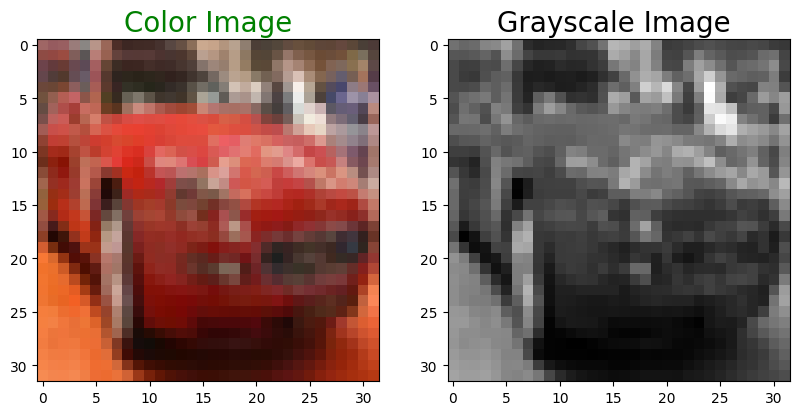

In [5]:
for i in range(3,6):
  plot_images(x_train[i],color.rgb2gray(x_train[i]))

## Enunciado de la práctica 1

Para esta práctica hemos creido necesario que se debe poner en práctica todo lo impartido hasta la fecha, es decir, no solo las arquitecturas impartidad sino tambien las diferentes tipologías de redes mostrada hasta el momento.

Para ello, mediante el dataset anterior queremos implementar un modelo capaz de frente a una entrada de imagenes en blanco y negro, sea capaz de colorearlas. De esta manera se establecen los siguiente puntos:


1.   Implementar la arquitectura mediante redes MLP
2.   Implementar la arquitectura mediante redes Convolucionales
3.   (Opcional) Probar diferentes arquitecturas CNN que puedan mejorar lo resultados.



In [6]:
X_train = color.rgb2gray(x_train)
X_test = color.rgb2gray(x_test)

In [7]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [8]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [9]:
X_train.shape

(50000, 32, 32)

In [10]:
y_train.shape

TensorShape([50000, 10])

In [11]:
#Ahora definimos el modelo de nuestra red MLP
def MLP_model():
  model = keras.Sequential()
  model.add(Flatten(input_shape=(32,32,1)))
  model.add(Dense(2048, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [12]:
model = MLP_model()

In [13]:
# Entrenamos el modelo
history = model.fit(X_train, y_train,batch_size=40, epochs=30, validation_split=0.2, validation_data=(X_test, y_test))

Epoch 1/30
1250/1250 [==============================] - 15s 5ms/step - loss: 0.3029 - accuracy: 0.2387 - val_loss: 0.2824 - val_accuracy: 0.3054
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2793 - accuracy: 0.3160 - val_loss: 0.2759 - val_accuracy: 0.3297
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2700 - accuracy: 0.3467 - val_loss: 0.2657 - val_accuracy: 0.3675
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2637 - accuracy: 0.3663 - val_loss: 0.2655 - val_accuracy: 0.3570
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2583 - accuracy: 0.3823 - val_loss: 0.2651 - val_accuracy: 0.3567
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2542 - accuracy: 0.3944 - val_loss: 0.2580 - val_accuracy: 0.3833
Epoch 7/30
1250/1250 [==============================] - 6s 4ms/step - loss: 0.2496 - accuracy: 0.4082 - val_loss: 0.2543 - val_accuracy

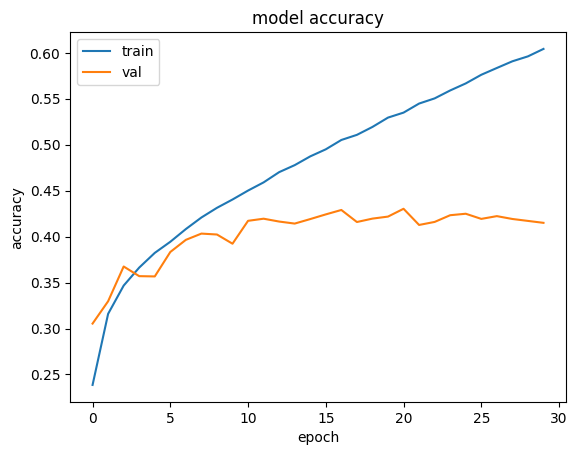

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

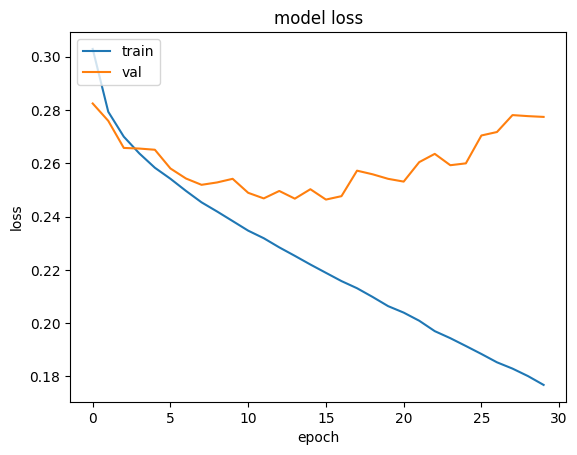

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
evaluation = model.evaluate(X_test, y_test)
print("accuracy: %.2f%%" % (evaluation[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.2774 - accuracy: 0.4150
accuracy: 41.50%


Tenemos una precisión muy mejorable, veremos como la red convolucional interpreta mucho mejor los datos y obtiene muchas más precisión que esta

In [17]:
#Ahora creamos el modelo de nuestra red convolucional CNN
def CNN_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), padding='same',strides=1, activation='relu', input_shape=(32, 32, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (5, 5), padding='same',strides=1, activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (5, 5), padding='same',strides=1, activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [18]:
model2=CNN_model()

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       102528    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)        

In [20]:
#Entrenamos el modelo
history = model2.fit(X_train, y_train,batch_size=40, epochs=30, validation_split=0.2, validation_data=(X_test, y_test))

Epoch 1/30
1250/1250 [==============================] - 16s 7ms/step - loss: 0.2500 - accuracy: 0.4043 - val_loss: 0.2055 - val_accuracy: 0.5308
Epoch 2/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1846 - accuracy: 0.5913 - val_loss: 0.1663 - val_accuracy: 0.6396
Epoch 3/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1580 - accuracy: 0.6605 - val_loss: 0.1561 - val_accuracy: 0.6641
Epoch 4/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1428 - accuracy: 0.6948 - val_loss: 0.1438 - val_accuracy: 0.6965
Epoch 5/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1300 - accuracy: 0.7249 - val_loss: 0.1362 - val_accuracy: 0.7116
Epoch 6/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1201 - accuracy: 0.7496 - val_loss: 0.1323 - val_accuracy: 0.7256
Epoch 7/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1120 - accuracy: 0.7702 - val_loss: 0.1298 - val_accuracy

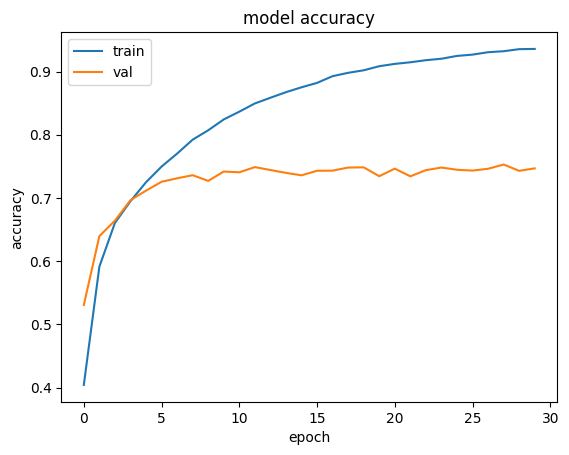

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

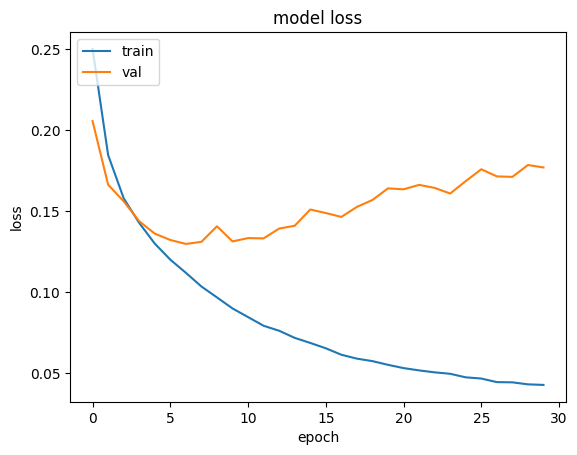

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
eval = model2.evaluate(X_test, y_test)
print("accuracy: %.2f%%" % (eval[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.1769 - accuracy: 0.7468
accuracy: 74.68%


Como conclusión podemos asegurar que es mucho más óptimo el uso de una red neuronal convolucional en este caso